# Risk Indicators and Trading Strategies

The values of shares in solvent companies, in recent years, have a tendency to increase and continue to increase in the future. However, due to multiple external factors, such as geopolitics, for example, fluctuations over time are more evident, with days or periods of low, which indicates the generation of financial losses, and therefore, a risk to the company.

Recentlty, I had the oportunity to follow the market activity in Euroclear of the CCP: ICE Clear Europe, which offers clearing and risk management services for crude oil, interest rate, equity index, power agricultural and energy derivatives. Due to the ongoing war in Ukraine, the list of sanctions imposed to Russia and the cutting of gas sources to Europe, this entity has a lot to show market-wise, which is why I decided to analize it, using several statistical tools. 

I took the data of ICE Clear Europe from the Yahoo! Finance platform, with the help of the Python library: *yfinance*, found in the requirement.txt file, in case it is necessary to install. Initially, I implemented a simple momentum based strategy on ICE Clear Europe with several rolling periods, to check the annual returns and to study the up and down patterns. The 15 days rolling window prodived strong annual returns, however, some scatters are observed, specially in the strong-positive-trending periods. 

Later, I used more sophisticated momentum indicators such as Simple Moving Average, Exponential Moving Average, Average True Range, Average Directional Movement, Relative Strength Index and the The Moving Average Convergence Divergence, as I am interested in the threshold that will trigger the signal for postive returns. Based on these six indicators, the best trading strategy comes from Average Directional Movement with a 72% profit.

As ongoing works, I am still working to include Machine Learning based strategies with several supervised models such as Random Forest, CatBoost, k-Nearest Neighbors and Neural Networks. I am working as well on Time-Series forecasting to predict, in the forthcoming days, the best trading strategy.

## Loading the basic modules

To get started, I will load some necessary modules needed in this study. Notice in the *config.py* script, you can modify some of the parameters and adapt this project to the desired company. 

***I keep private the codes till I finish this project, then I will upload it and share it to the public on GitHub.***

In [1]:
import numpy as np
import source.config as config
import source.preprocessing_functions as pf
from source.preprocessing_functions import Complete_Dates, Moving_Average, Exponential_Moving_Average
from source.preprocessing_functions import  Average_True_Range, Average_Directional_Movement, Relative_Strength_Index
from source.preprocessing_functions import Moving_Average_Convergence_Divergence, Date_Columns, Target_Variable

np.random.seed(config.SEED)

## Loading the data

As mentioned, the data will be pulled over the Yahoo! Finance platform, using the library *yfinance*. I will load the data for ICE Clear Europe, which acronym is *ICE* and passed as argument to the function *load_data* under **NAME**; then, I am interested on a time **WINDOW** starting from Jan $1^{st}$ 2018 till the last closing date, which is yesterday, and I want to retreive the daily data, specified as **PERIOD**.

In [2]:
data = pf.load_data(config.NAME,config.WINDOW,config.PERIOD)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,66.659493,66.659493,65.519774,65.792931,3195300,0.0,0
2018-01-03,65.877721,67.139887,65.557465,66.791382,4312600,0.0,0
2018-01-04,66.791370,68.703461,66.518213,68.053535,3035000,0.0,0
2018-01-05,67.968757,68.656353,67.770948,68.618675,2152200,0.0,0
2018-01-08,68.675199,69.080217,68.373779,68.873001,1952000,0.0,0
...,...,...,...,...,...,...,...
2022-09-21,95.519997,96.110001,93.559998,93.610001,3828400,0.0,0
2022-09-22,93.459999,94.550003,92.970001,94.059998,2653600,0.0,0
2022-09-23,93.459999,93.949997,91.959999,93.239998,2980200,0.0,0


In the above table is shown the daily *Open* (price of the stock when the market opened on this day), *High* (the highest price of the stock on this day), *Low* (the lowest price of the stock on this day) and *Close* (the price of the stock when the market closed the day before) values (Currency in USD) of the ICE Clear Europe stocks. 

However, I see some missing dates such as the 2018-01-01, etc., which corresponds to enterprise holidays and weekends. I will reindex the table in such a way that it will contain those missing days, and fill the corresponding missing values in the other columns, with those of the previous day, as the enterprise suspends all activities.

In [3]:
complete_dates = Complete_Dates(config.WINDOW)
data = complete_dates.fit_transform(data,config.WINDOW)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2018-01-01,66.659493,66.659493,65.519774,65.792931,3195300.0,0.0,0.0
2018-01-02,66.659493,66.659493,65.519774,65.792931,3195300.0,0.0,0.0
2018-01-03,65.877721,67.139887,65.557465,66.791382,4312600.0,0.0,0.0
2018-01-04,66.791370,68.703461,66.518213,68.053535,3035000.0,0.0,0.0
2018-01-05,67.968757,68.656353,67.770948,68.618675,2152200.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-09-23,93.459999,93.949997,91.959999,93.239998,2980200.0,0.0,0.0
2022-09-24,92.860001,93.050003,91.550003,91.589996,4205000.0,0.0,0.0
2022-09-25,92.860001,93.050003,91.550003,91.589996,4205000.0,0.0,0.0
2022-09-26,92.860001,93.050003,91.550003,91.589996,4205000.0,0.0,0.0


 Below are shown the temporal evolution of the *Closing prices* and the physical number of shares traded, also known as *Volume*. In continuous blue lines, are shown the corresponding weekly moving averages.

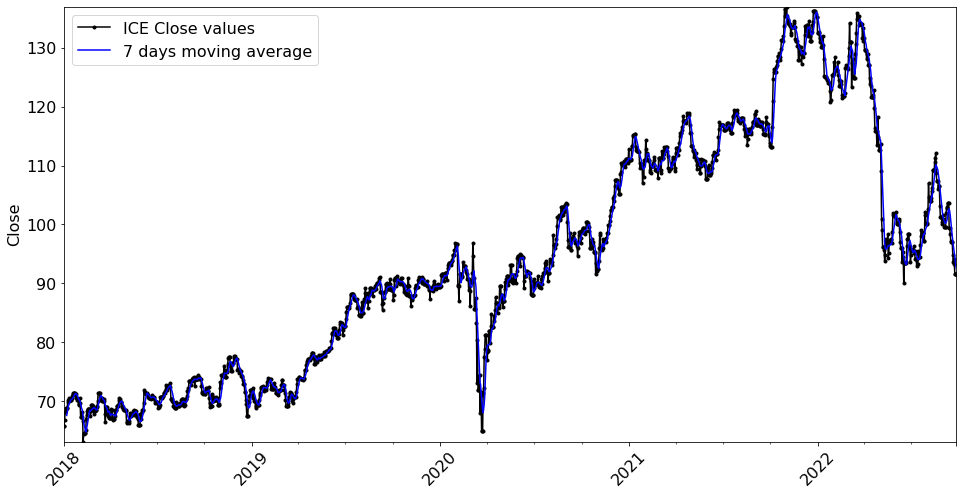

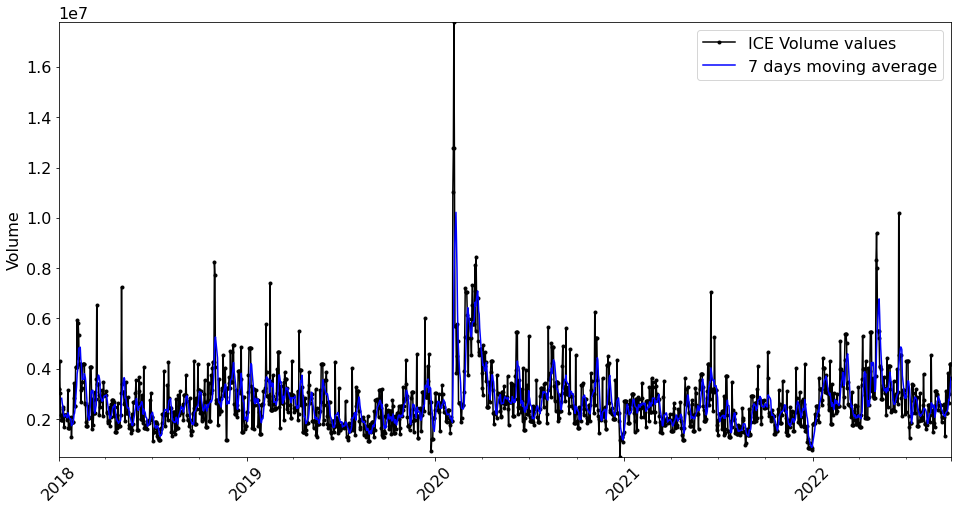

In [4]:
for el in ['Close','Volume']:
    pf.plot_time_series(config.NAME,data,el,config.ROLLING_AVERAGE)

I see a abrupt fall in the *Closing prices* at the end of **March 2020**, probably associated to the beginning of Covid-19 crisis. Then the *Closing prices* show a positive trend (with fluctuations), till **April 2022**, where they fell again, associated probably to Russia's cutting gas politics to Poland and Bulgaria, and to the rest of Europe.

# Simple momentum indicator strategy

In this section, I will use a simple Moving Average to simulate a strategy and return the yearly cumulative sum of the performance to see how they stack up. I am using 7, 15, 30, and 90-day lookback periods in order to avoid possible false trends.

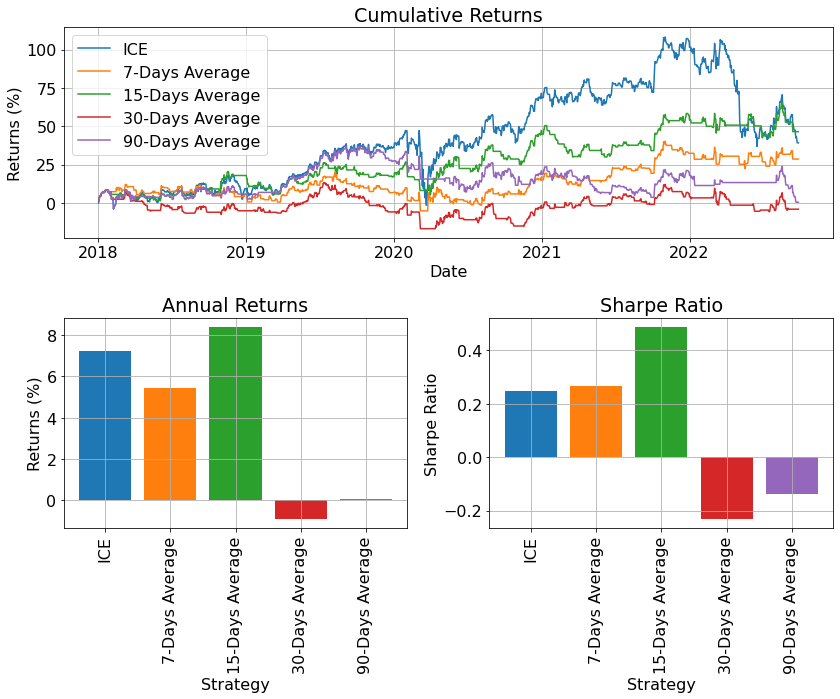

In [5]:
pf.Simple_Momentum_Strategy(config.NAME,data,'Close',config.MOMENTUM_PERIODS)

I see that the 15 days lookback period gives the best absolute and risk-adjusted returns. However, large dispersions are observed, specially at large Close values, thus showing a lack of robust strategy. I will use, in the following section, more elaborated strategies by incorporating other indicators, such as exponentially weighted moving averages and Relative Strength Index to indicate momentum. This way, we could manage our risk better by incorporating stop losses or trailing stops to get out of trades closer to the top rather then when we have a down or flat 15-days.

# Other Risk Indicators

As mentioned in the preceeding section, I will use other risk indicators to build a trading strategy. Amongst many of them, I will particularly use:

1. Exponential Moving Average (EMA)
2. Average True Range (ATR)
3. Average Directional Movement (ADX)
4. Relative Strenght Index (RSI)
5. Moving Average Convergence Divergence (MACD)

I will compute the first five indicators with a 15-days lookback, as it was the best result given by the simple momentum strategy. Regarding the MACD, I will compute it with a fast period of 7 days, slow period of 15 days, and a smoothing factor of 7.

## Creating predictor variables

In this section I am creating the above list of indicators as python objects. I will as well reduce the memory usage of the data by choosing the optimal data types.

In [6]:
# Momentum indicator class initialization
# =======================================
ma = Moving_Average('Close',15)
ema = Exponential_Moving_Average('Close',15)
atr = Average_True_Range('Close',15)
adx = Average_Directional_Movement('Close',15)
rsi = Relative_Strength_Index('Close',15)
macd = Moving_Average_Convergence_Divergence('Close',config.FAST_PERIOD,config.SLOW_PERIOD,config.SMOOTH)
date_columns = Date_Columns()
target = Target_Variable('Close')


# Creates momentum indicators
# ===========================
data = ma.fit_transform(data)
data = ema.fit_transform(data)
data = atr.fit_transform(data)
data = adx.fit_transform(data)
data = rsi.fit_transform(data)
data = macd.fit_transform(data)

# Reduces memory usage
# ====================
data = pf.reduce_mem_usage(data)

data

Memory usage of dataframe is 0.34 MB --> 0.10 MB (Decreased by 71.2%)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA,MA_Signal,MA_Hist,...,ATR_Hist,ADX,ADX_Signal,ADX_Hist,RSI,RSI_Signal,RSI_Hist,MACD,MACD_Signal,MACD_Hist
2018-01-01,66.6875,66.6875,65.5000,65.8125,3195300.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2018-01-02,66.6875,66.6875,65.5000,65.8125,3195300.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2018-01-03,65.8750,67.1250,65.5625,66.8125,4312600.0,0.0,0.0,NaN,NaN,NaN,...,NaN,100.0000,100.000000,0.000000,NaN,NaN,NaN,0.124817,0.031204,0.093628
2018-01-04,66.8125,68.6875,66.5000,68.0625,3035000.0,0.0,0.0,NaN,NaN,NaN,...,NaN,100.0000,100.000000,0.000000,NaN,NaN,NaN,0.360596,0.113525,0.247070
2018-01-05,68.0000,68.6875,67.7500,68.6250,2152200.0,0.0,0.0,NaN,NaN,NaN,...,NaN,100.0000,100.000000,0.000000,NaN,NaN,NaN,0.574707,0.228882,0.345947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,93.4375,93.9375,91.9375,93.2500,2980200.0,0.0,0.0,98.3750,100.5000,-2.156250,...,-0.098267,35.3750,27.906250,7.476562,25.015625,33.562500,-8.539062,-2.054688,-1.667969,-0.386475
2022-09-24,92.8750,93.0625,91.5625,91.5625,4205000.0,0.0,0.0,97.6250,100.1875,-2.552734,...,-0.054199,37.3125,29.078125,8.234375,21.984375,32.093750,-10.117188,-2.246094,-1.812500,-0.433838
2022-09-25,92.8750,93.0625,91.5625,91.5625,4205000.0,0.0,0.0,96.8125,99.7500,-2.939453,...,-0.006424,39.1250,30.328125,8.789062,21.984375,30.843750,-8.851562,-2.302734,-1.935547,-0.367188
2022-09-26,92.8750,93.0625,91.5625,91.5625,4205000.0,0.0,0.0,96.0000,99.2500,-3.277344,...,0.035400,40.8125,31.640625,9.164062,21.984375,29.734375,-7.742188,-2.267578,-2.017578,-0.248901


## Simple Moving Average

A simple moving average (SMA) is commonly used stock indicator. The SMA helps to smooth out the data by creating a constantly updated average price over a certain period of time. In this particular case, I used a 15-days lookback. By calculating the SMA, the impacts of random, short-term fluctuations on the Closing price over a specified time frame are mitigated.

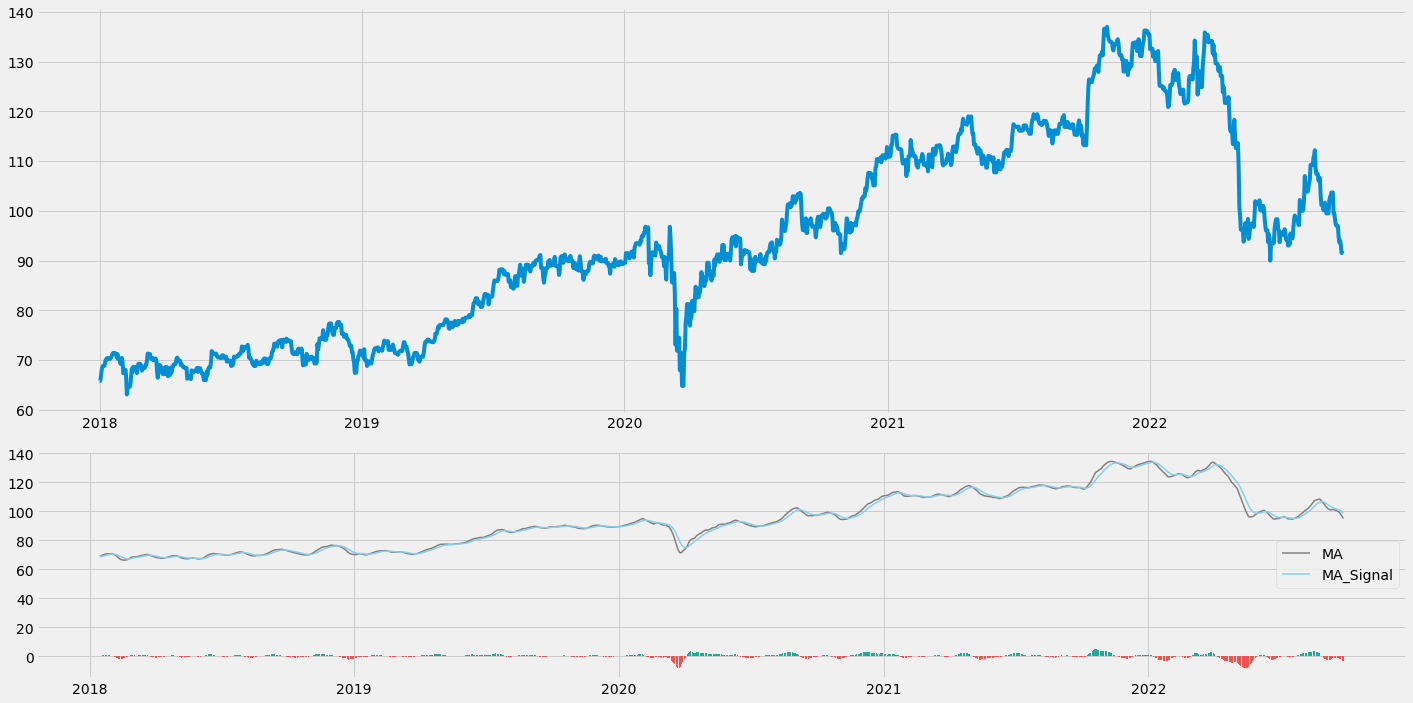

Trading Strategy


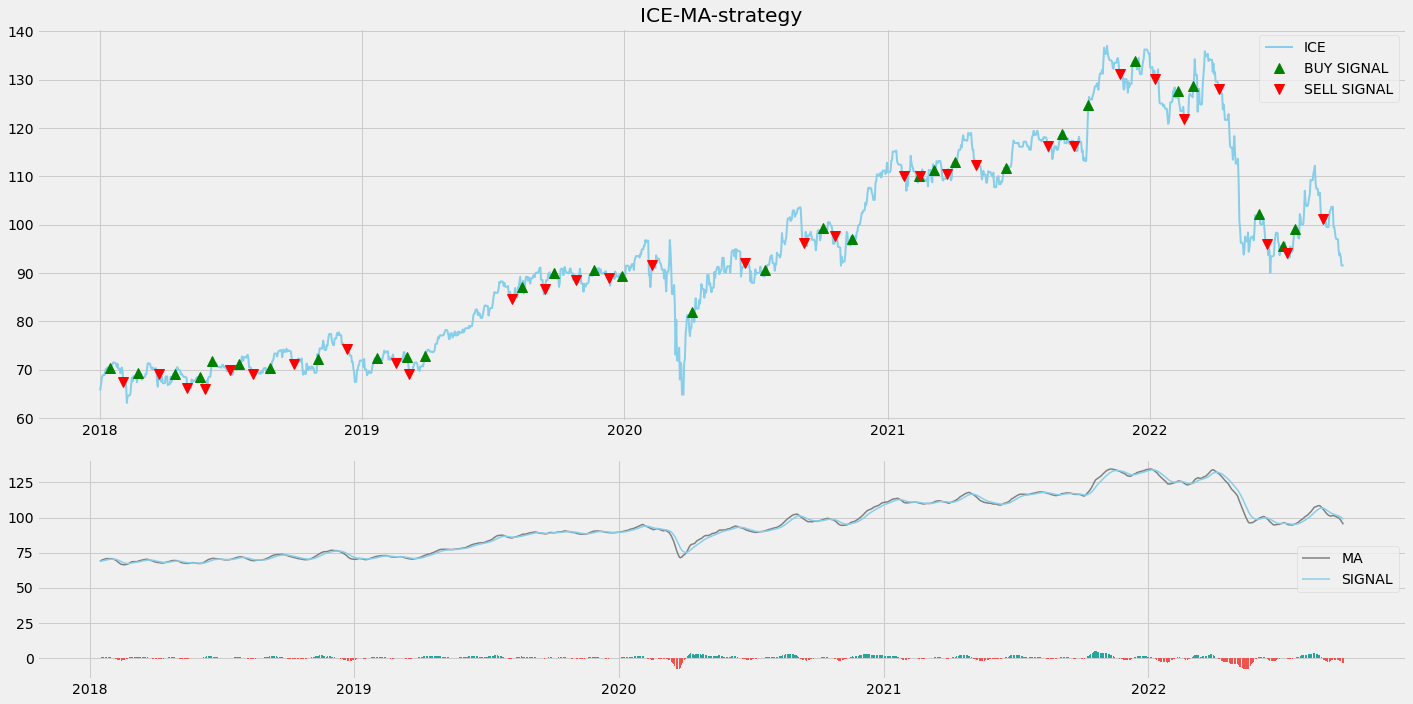

Backtesting:
Profit gained from the MA strategy by investing $100k in ICE : 30380.0
Profit percentage of the MA strategy : 30%


In [7]:
pf.indicator_strategy(config.NAME,data,'Close','MA','MA_Signal','MA_Hist')

## Exponential Moving Average

The Exponential Moving Average (EMA) is an indicator that tracks the Closing price of the investment over time. Compared to SMA, EMAs give greater weight to recent (more relevant) data, which is considered to be more relevant than older data. Since new data carries greater weight, the EMA responds more quickly to price changes than the SMA does. 

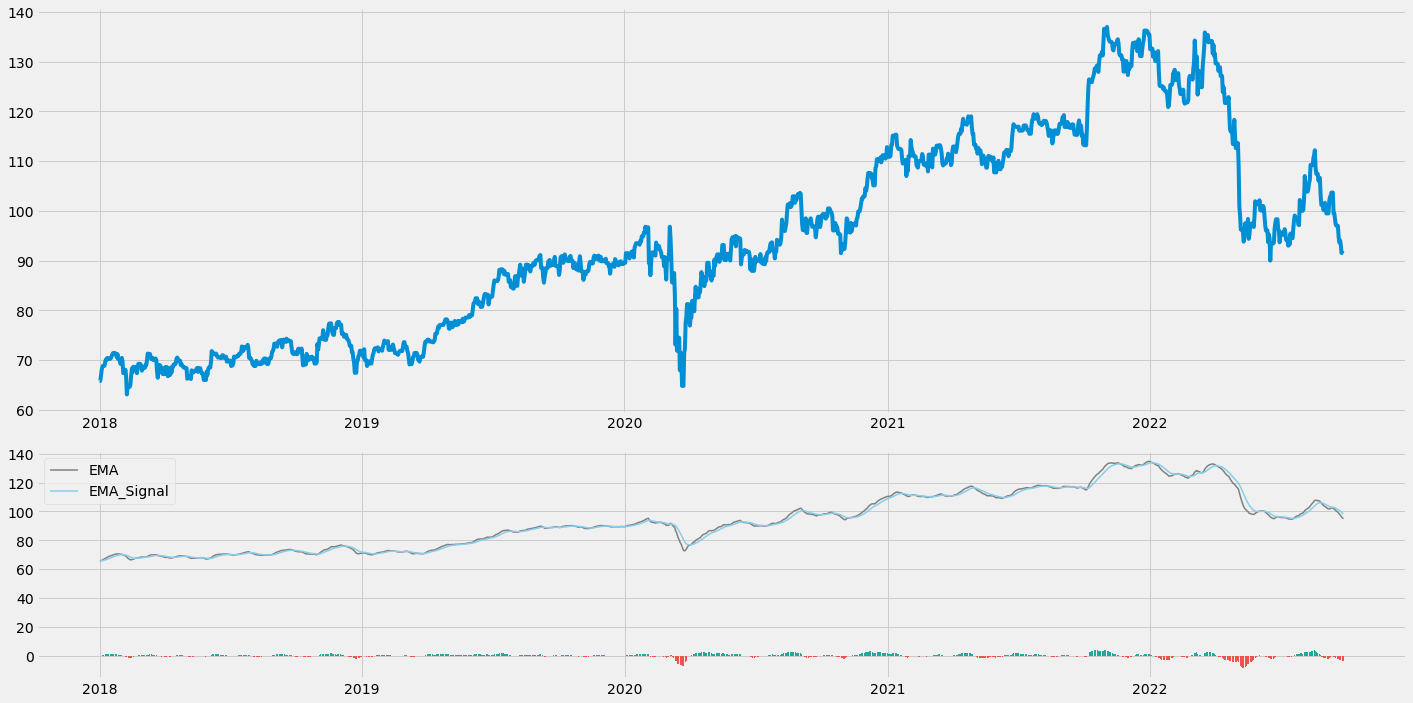

Trading Strategy


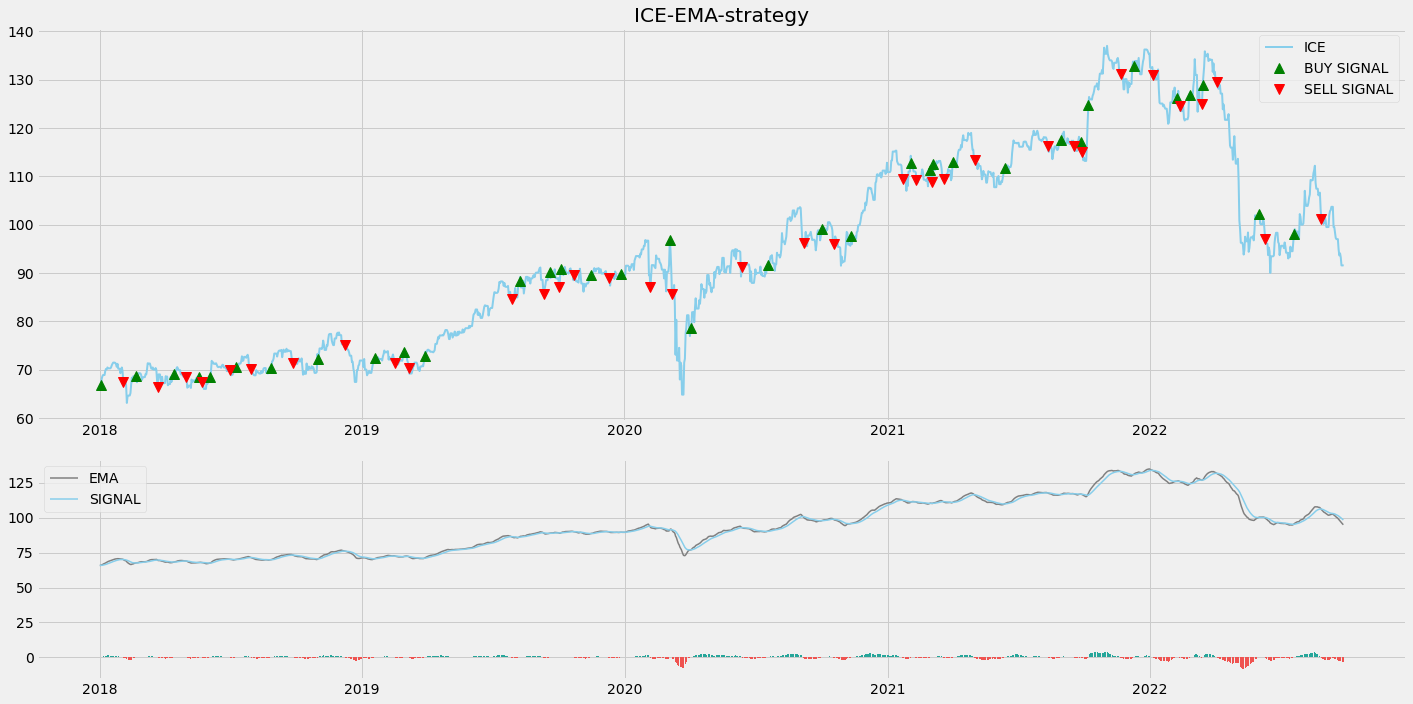

Backtesting:
Profit gained from the EMA strategy by investing $100k in ICE : 9683.62
Profit percentage of the EMA strategy : 9%


In [8]:
pf.indicator_strategy(config.NAME,data,'Close','EMA','EMA_Signal','EMA_Hist')

## Average True Range

The Average True Range (ATR) is an indicator, to measure market volatility by decomposing the entire range of an asset price for a lookback period. The true range indicator is taken as the greatest of the following: current High less the current Low; the absolute value of the current High less the previous Close; and the absolute value of the current Low less the previous Close. The ATR is then a moving average, generally using 14-15 days, of the true ranges. The ATR was originally developed for use in commodities markets but has since been applied to all types of securities.

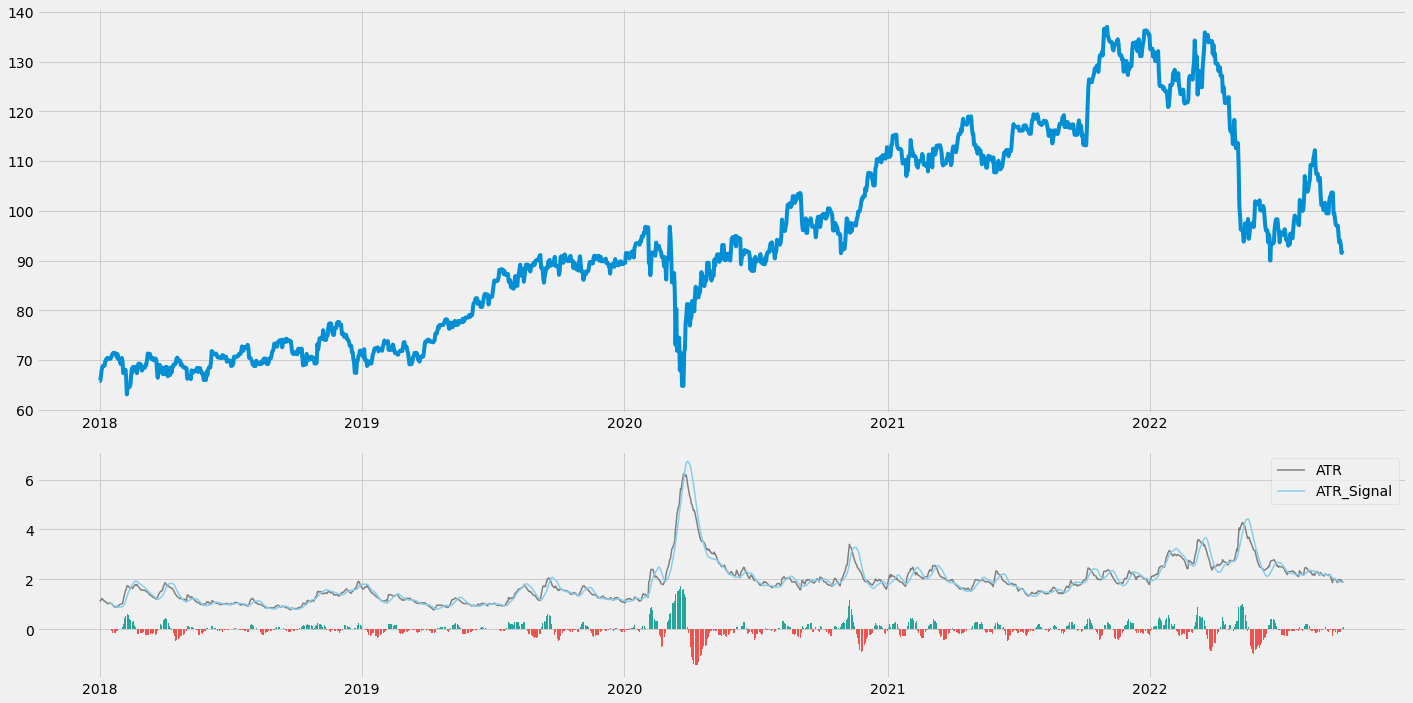

Trading Strategy


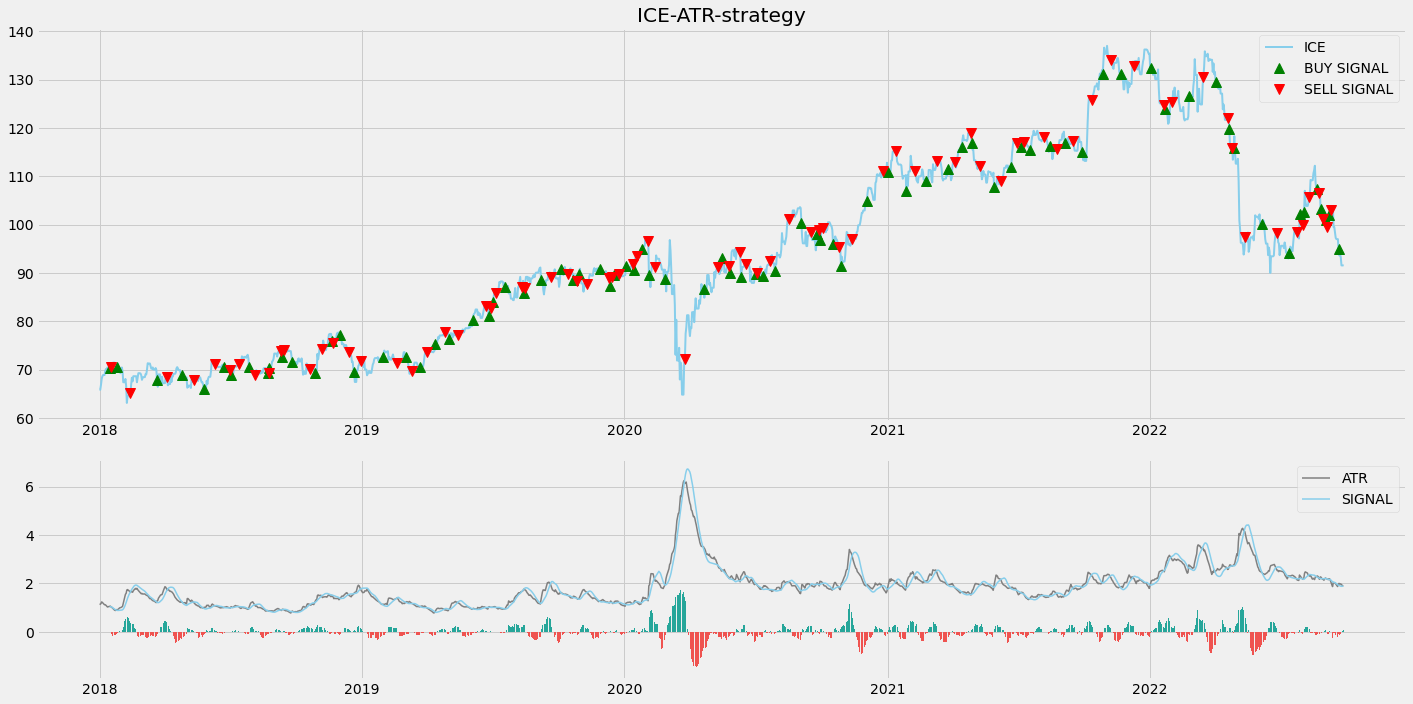

Backtesting:
Profit gained from the ATR strategy by investing $100k in ICE : 71772.75
Profit percentage of the ATR strategy : 71%


In [9]:
pf.indicator_strategy(config.NAME,data,'Close','ATR','ATR_Signal','ATR_Hist')

## Average Directional Movement

The Average Directional Movement/Index (ADX) is the primary technical indicator among the five indicators that make up a technical trading system, and it is calculated using the other indicators that make up the trading system. The ADX is primarily used as an indicator of momentum, or trend strength, but the total ADX system is also used as a directional indicator. Directional movement is calculated by comparing the difference between two consecutive Lows with the difference between their respective Highs.

The ADX is used in several markets by technical traders to judge the strength of a trend. The ADX makes use of a positive (+DI) and negative (-DI) directional indicator in addition to the trendline. The trend has strength when ADX is above 25; the trend is weak or the price is trendless when ADX is below 20. Non-trending doesn't mean the price isn't moving. It may not be, but the price could also be making a trend change or is too volatile for a clear direction to be present.

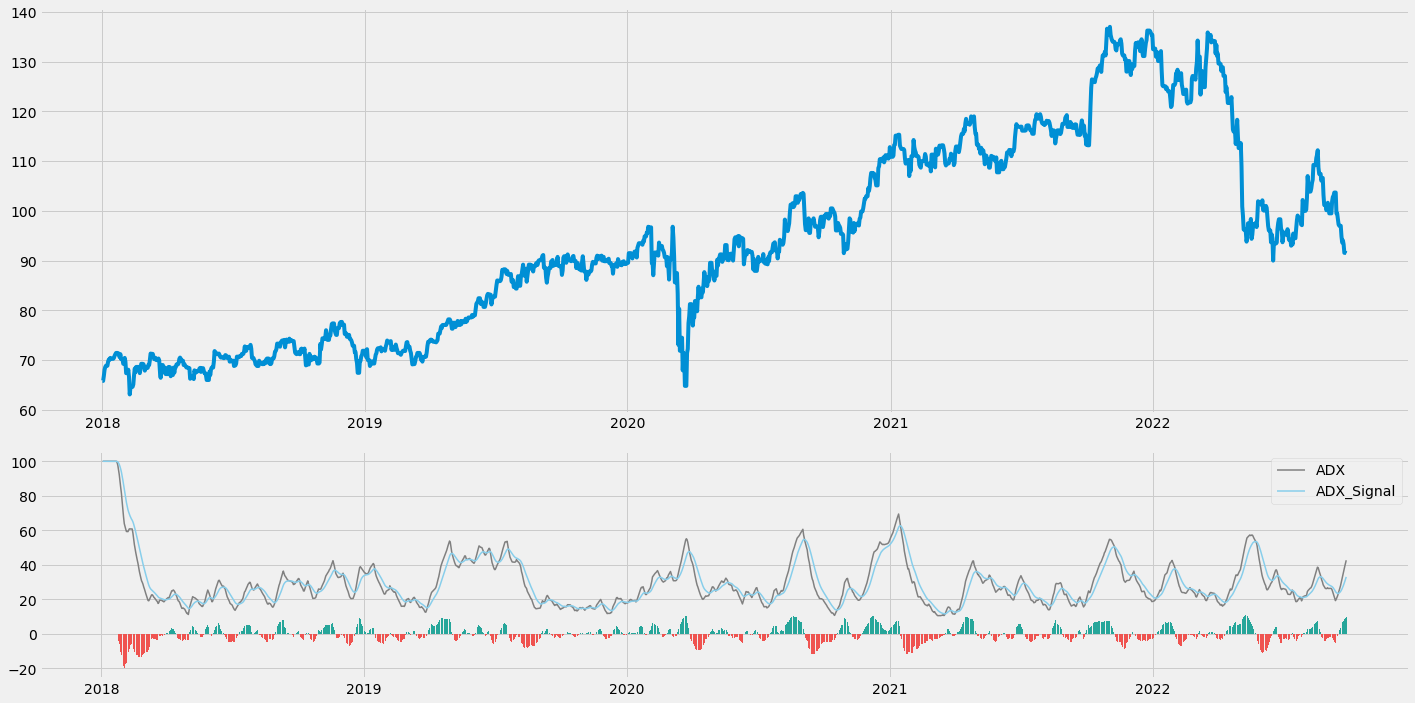

Trading Strategy


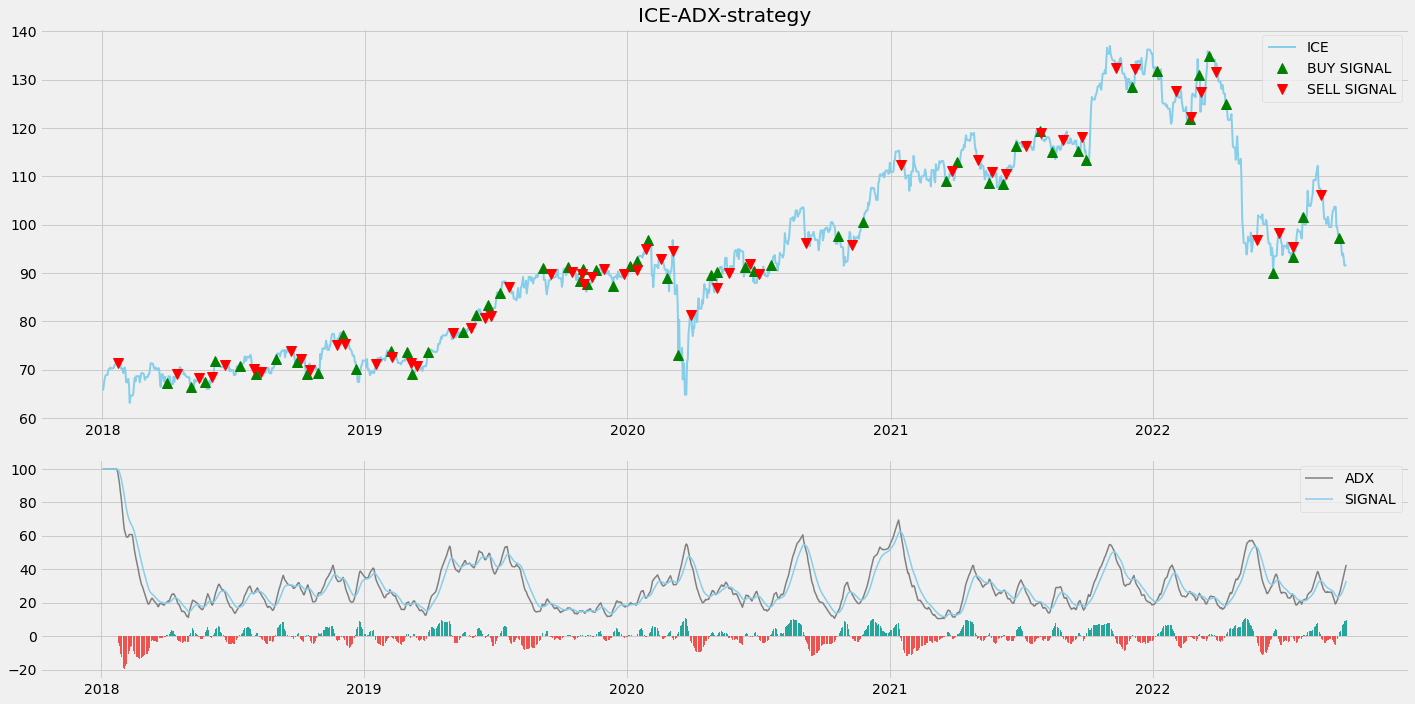

Backtesting:
Profit gained from the ADX strategy by investing $100k in ICE : 72152.5
Profit percentage of the ADX strategy : 72%


In [10]:
pf.indicator_strategy(config.NAME,data,'Close','ADX','ADX_Signal','ADX_Hist')

## Relative Strength Index

The Relative Strength Index (RSI) is a momentum indicator that describes the current price relative to average high and low prices over a previous trading period. This indicator estimates overbought or oversold status and helps spot trend reversals, price pullbacks, and the emergence of bullish or bearish markets.

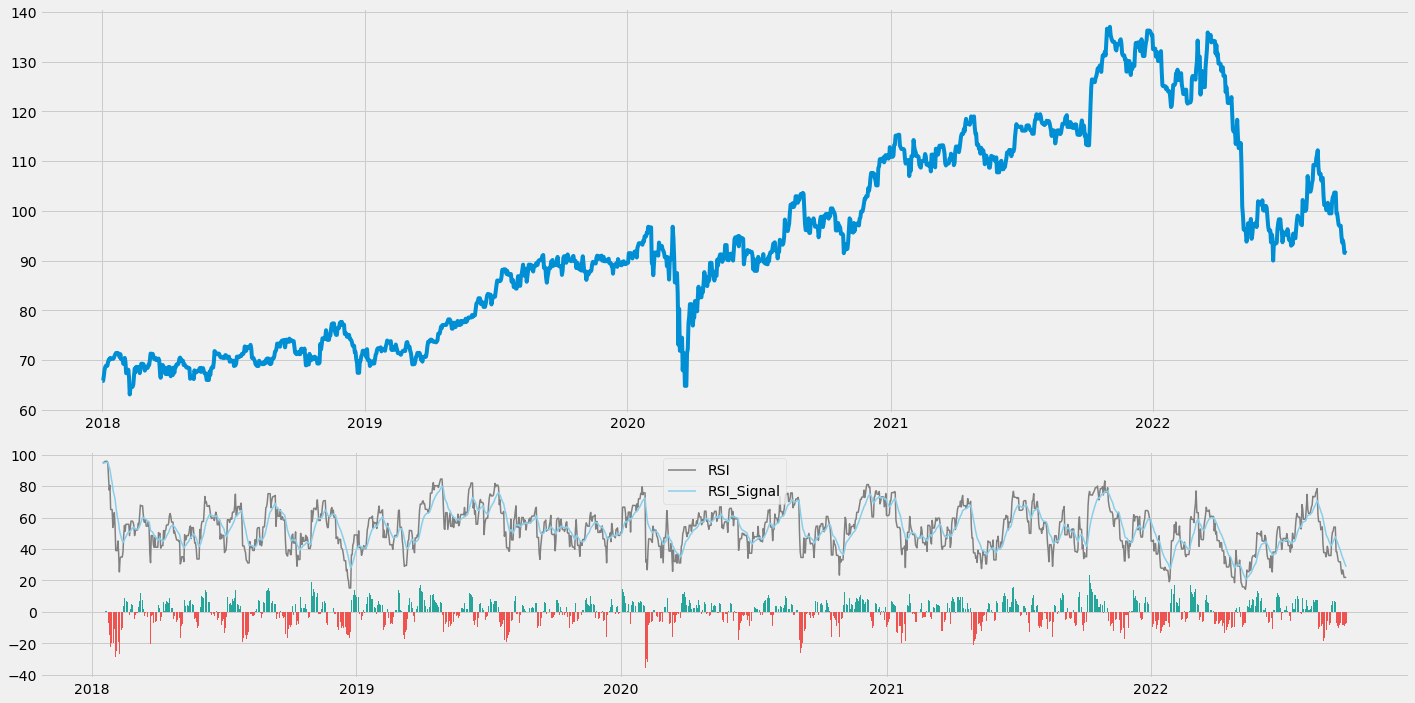

Trading Strategy


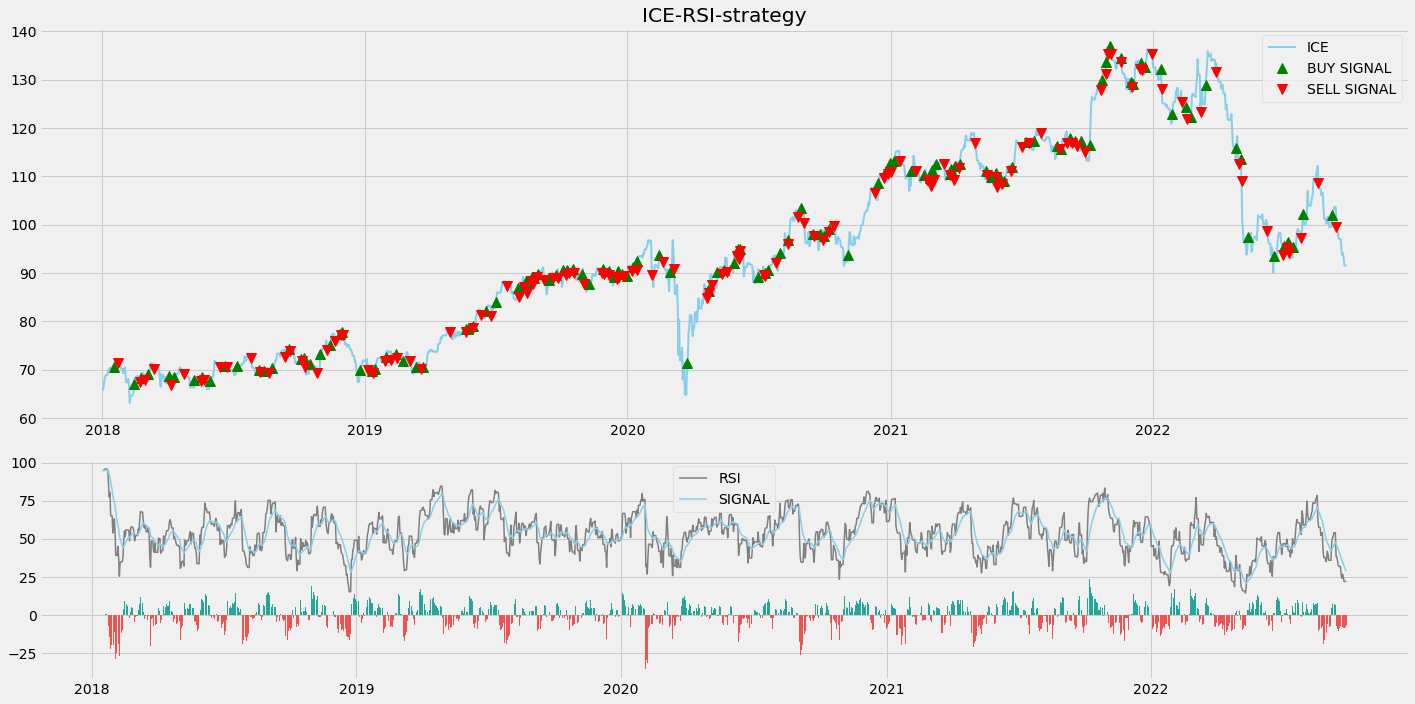

Backtesting:
Profit gained from the RSI strategy by investing $100k in ICE : 55443.5
Profit percentage of the RSI strategy : 55%


In [11]:
pf.indicator_strategy(config.NAME,data,'Close','RSI','RSI_Signal','RSI_Hist')

## Moving Average Convergence Divergence

The  is one of the most popular technical indicators used to generate signals among stock traders. This indicator serves as a momentum indicator that can help signal shifts in market momentum and help signal potential breakouts.

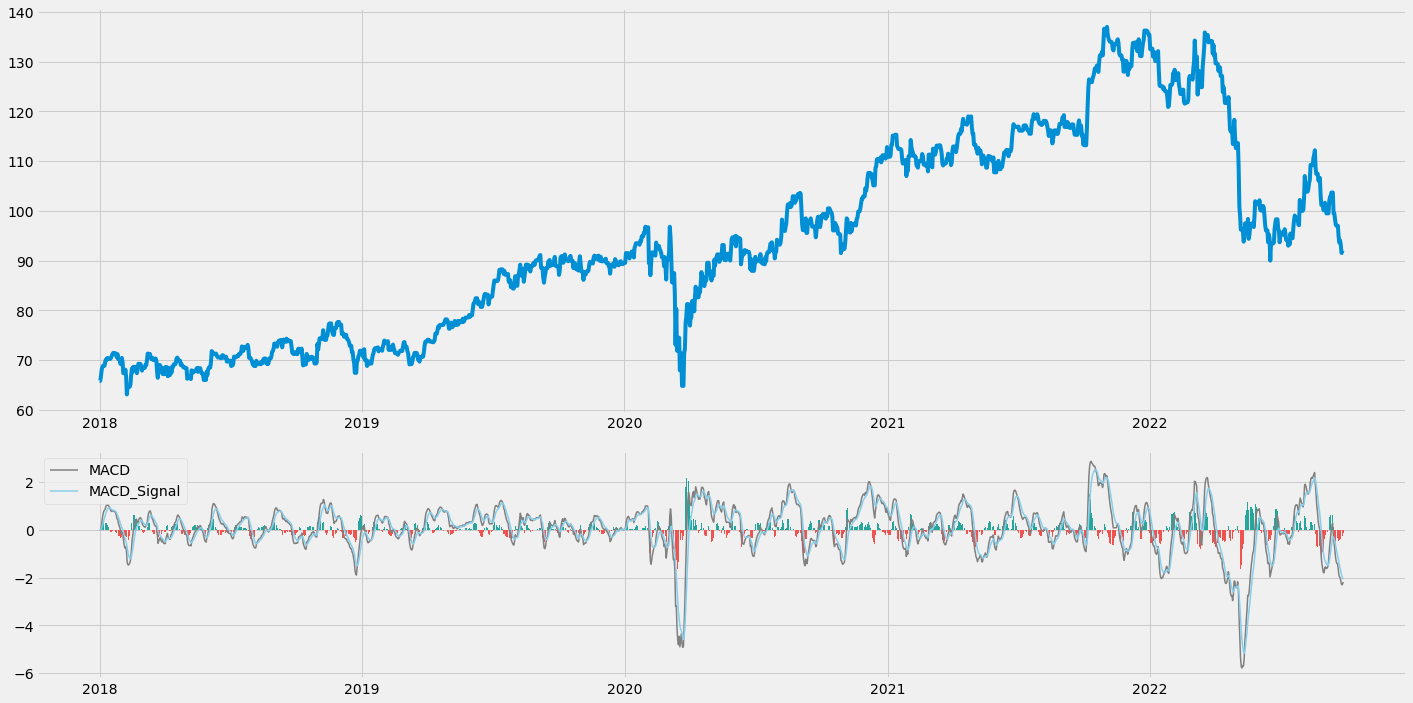

Trading Strategy


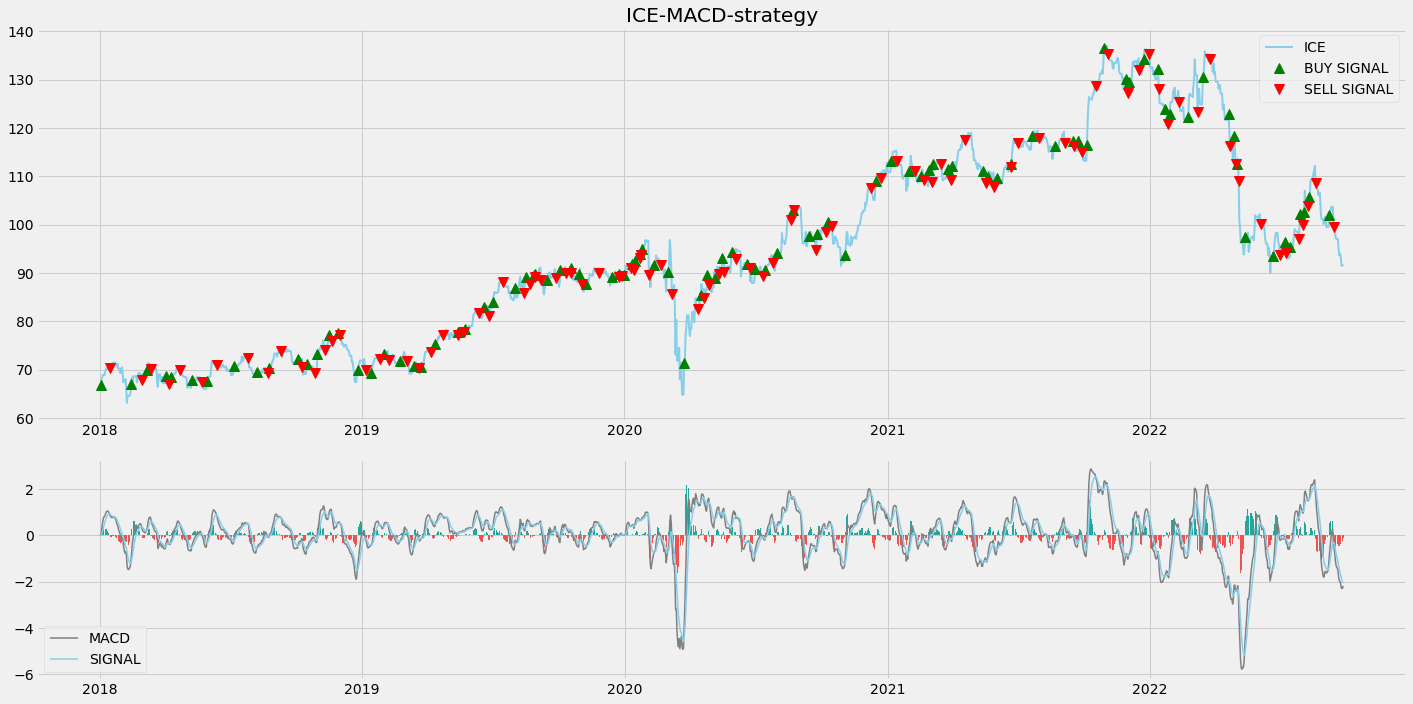

Backtesting:
Profit gained from the MACD strategy by investing $100k in ICE : 34747.12
Profit percentage of the MACD strategy : 34%


In [12]:
pf.indicator_strategy(config.NAME,data,'Close','MACD','MACD_Signal','MACD_Hist')